## Homework - Machine Learning Preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/My Drive/


/content/drive/My Drive



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [5]:
df_pec = pd.read_csv("Product_Exclusive_Classification.csv")


## Describe Data

In [6]:
df_pec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [7]:
cats = ['brand','category']
nums = ['rating','number_of_reviews','love','price','value_price','exclusive']

# ignore 'id' karena tidak dibutuhkan untuk analisis

In [8]:
df_pec[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7905.0,4.085136,0.761069,0.0,4.0,4.0,4.5,5.0
number_of_reviews,7991.0,303.574396,931.724460,0.0,14.0,56.0,231.5,19000.0
love,7966.0,17563.958951,44253.391743,0.0,2000.0,5500.0,15300.0,1300000.0
price,7992.0,49.900935,46.864764,2.0,24.0,35.0,59.0,549.0
value_price,7983.0,50.983300,48.473049,2.0,24.0,35.0,60.0,549.0
exclusive,8000.0,0.255875,0.436379,0.0,0.0,0.0,1.0,1.0


In [9]:
df_pec[cats].describe().T

,count,unique,top,freq
brand,8000,310,SEPHORA COLLECTION,492
category,7987,142,Perfume,619


In [10]:
df_pec.sample(10)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
2327,1822238,KVD Vegan Beauty,Face Brushes,4.5,334.0,37600.0,34.0,34.0,0
4562,2070852,Indie Lee,Blemish & Acne Treatments,3.5,37.0,3500.0,28.0,28.0,0
7675,2276350,innisfree,Moisturizers,5.0,26.0,4600.0,24.0,24.0,1
5860,2175461,Origins,Mini Size,4.0,48.0,11400.0,13.0,13.0,0
4071,2032084,Clarins,Face Masks,4.0,12.0,1800.0,34.0,34.0,0
5017,2110674,SEPHORA COLLECTION,Face Masks,4.5,112.0,12200.0,6.0,6.0,1
7097,2247815,beautyblender,Brush Sets,0.0,0.0,430.0,60.0,60.0,1
135,631937,Dior,Perfume,4.5,143.0,6900.0,105.0,105.0,0
7504,2267557,The Ordinary,Face Oils,4.5,28.0,7900.0,7.7,7.7,0
7550,2269991,Dr. Barbara Sturm,Face Wash & Cleansers,4.5,20.0,2000.0,70.0,70.0,0


# 1. Descriptive Statistics (5 poin)

## A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- **id** sebaiknya menggunakan tipe data **string/object** bukan **int** karena bukan nilai yang perlu diagregasi
- **rating** sebaiknya menggunakan tipe data **int**
- **number_of_reviews** sebaiknya menggunakan tipe data **int**
- **love** sebaiknya menggunakan tipe data **int**
- **category** sebaiknya untuk data kosong di kolom ini menggunakan nilai yang lebih jelas seperti **Other/Uncategorized/Unknown**

## B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [11]:
df_pec.isna().sum()

,0
id,0
brand,0
category,13
rating,95
number_of_reviews,9
love,34
price,8
value_price,17
exclusive,0


## C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

- Kolom **love** dan **number_of_reviews** memiliki lonjakan nilai **max** yang terlampau jauh dari nilai **75%** dan **median** serta **std** yang lebih besar dibandingkan nilai **mean** yang dihasilkan, ini mengindikasikan terdapat nilai **outlier** yang ekstrim

- Kolom **rating** memiliki keanehan karena terdapat nilai **0**, nilai tersebut menunjukkan produk yang belum diulas, bukan menandakan produk yang jelek, maka bisa diperlakukan sebagai *noise*

# 2. Univariate Analysis (10 poin)

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target).


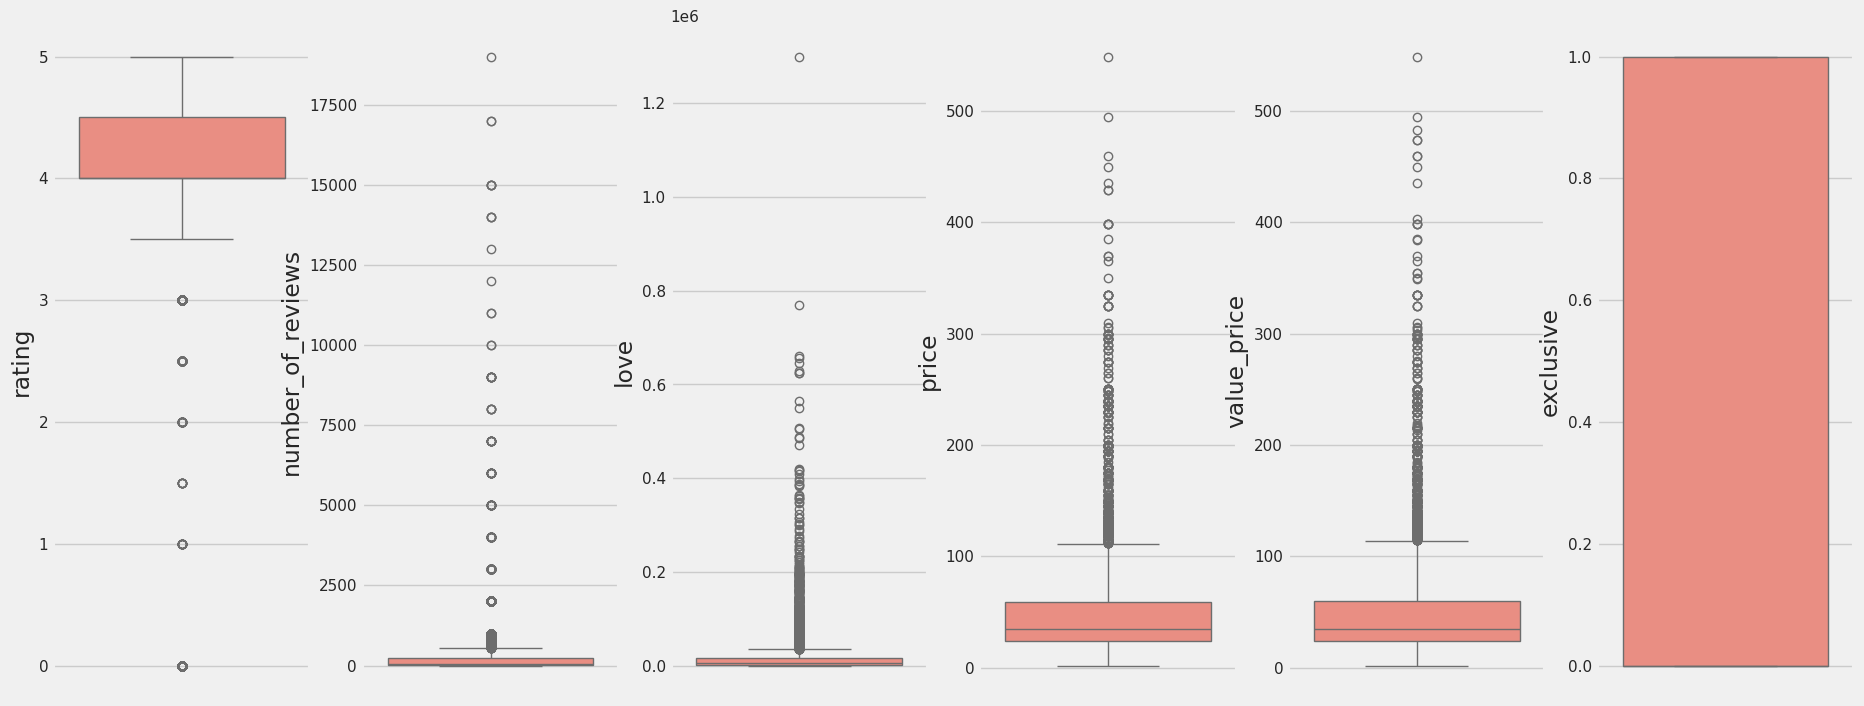

In [12]:
# Analisis kolom numerikal
for i in range(0,len(nums)):
  plt.subplot(1,len(nums),i+1)
  sns.boxplot(y=df_pec[nums[i]], color='salmon', orient='v')
  plt.tight_layout

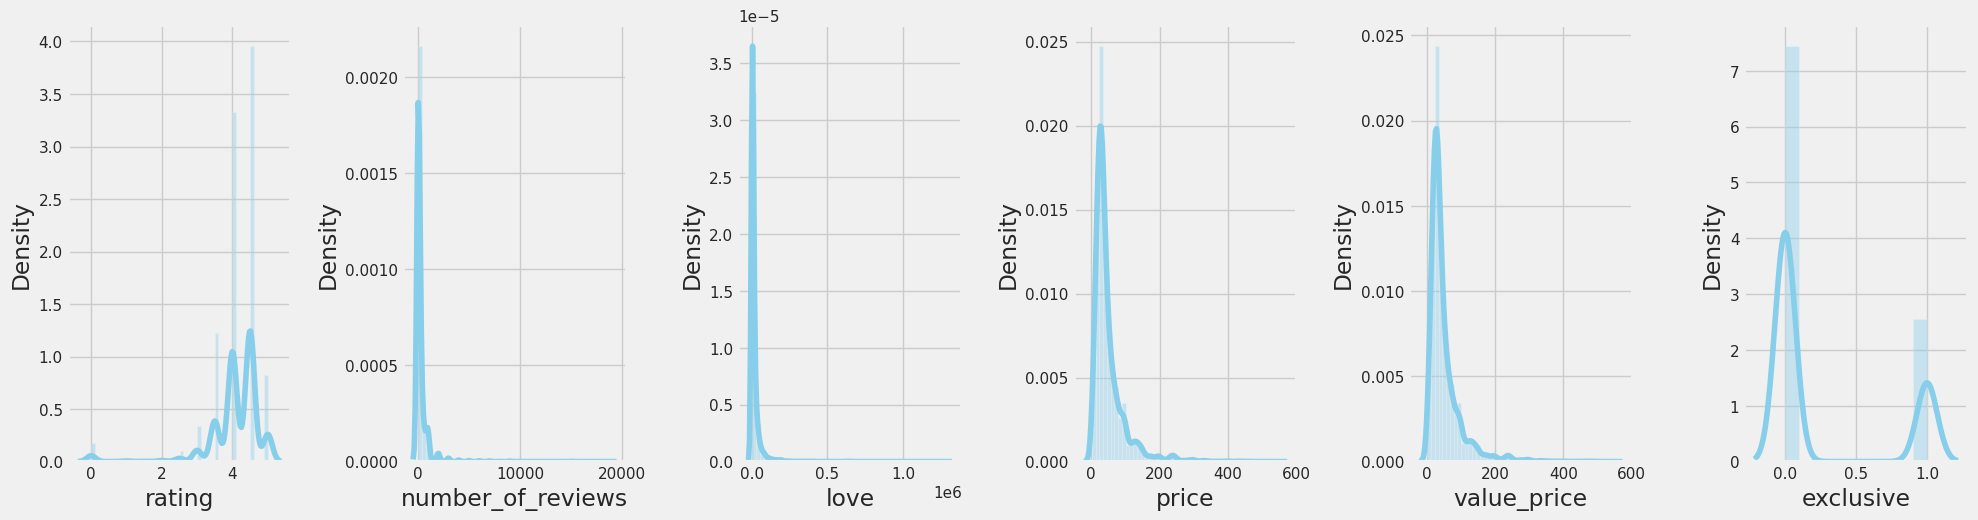

In [13]:
plt.figure(figsize=(20,10))
for i in range(0,len(nums)):
  plt.subplot(2,len(nums),i+1)
  sns.distplot(df_pec[nums[i]], color='skyblue')
  plt.tight_layout()

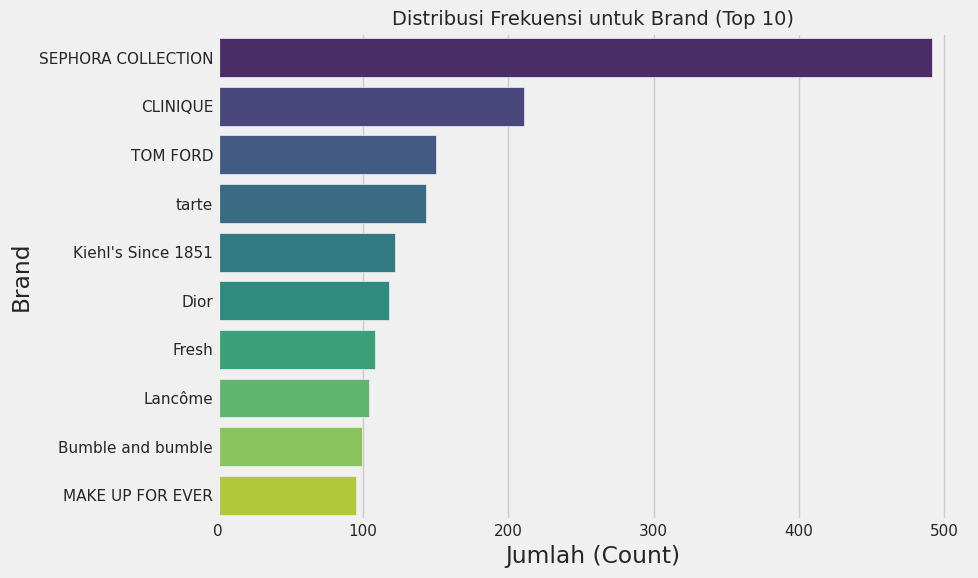

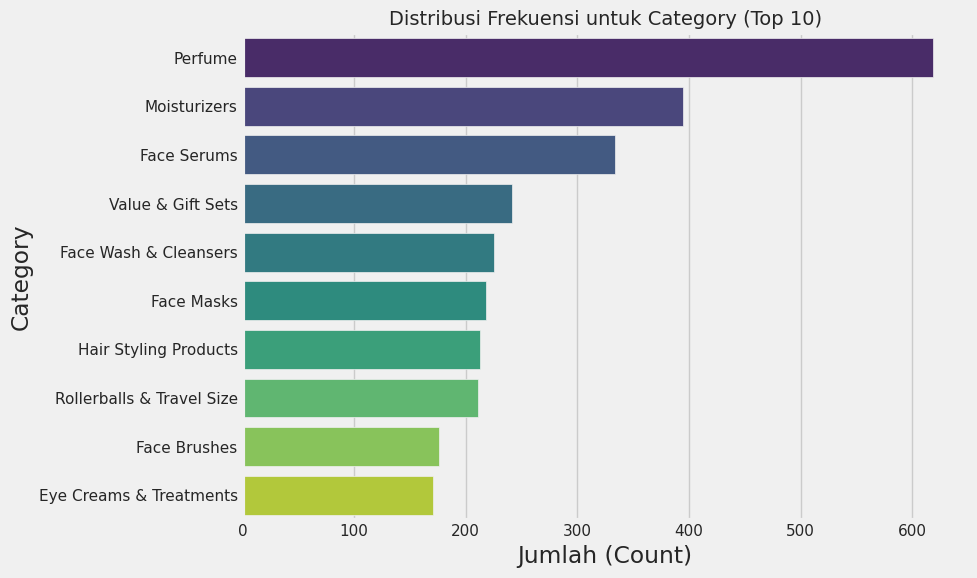

In [14]:
# Analisis kolom kategorikal
for col in cats:
    # Membuat kanvas untuk tiap kategori
    plt.figure(figsize=(10, 6))

    # Menampilkan countplot
    # Menggunakan order agar kategori yang paling banyak muncul ada di paling atas/depan
    sns.countplot(data=df_pec, y=col, order=df_pec[col].value_counts().iloc[:10].index, palette='viridis')

    # Memberikan judul dan label
    plt.title(f'Distribusi Frekuensi untuk {col.capitalize()} (Top 10)', fontsize=14)
    plt.xlabel('Jumlah (Count)')
    plt.ylabel(col.capitalize())

    # Agar tampilan tidak terpotong
    plt.tight_layout()
    plt.show()

# 3. Multivariate Analysis (15 poin)

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas).

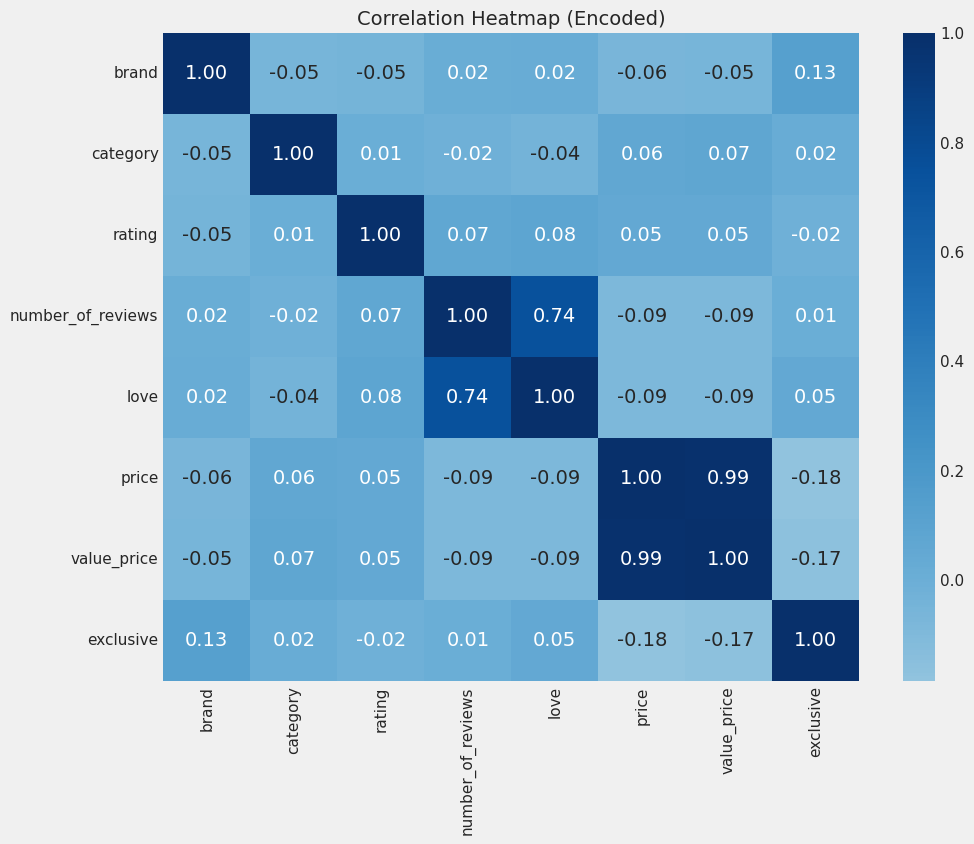

In [15]:
df_heatmap = df_pec.drop(columns=['id']).copy()

# Konversi kategori ke angka
for col in ['brand', 'category']:
    df_heatmap[col] = df_heatmap[col].astype('category').cat.codes

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, fmt=".2f", cmap='Blues', center=0)
plt.title('Correlation Heatmap (Encoded)', fontsize=14)
plt.show()

## A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

**Korelasi Feature terhadap Label (exclusive)**

Dilihat dari baris atau kolom terakhir (exclusive), nilai korelasi dengan fitur lainnya cenderung rendah (mendekati 0), namun ada beberapa fitur yang terlihat berpengaruh:

1. price (-0.18) & value_price (-0.17) menunjukkan korelasi negatif terkuat.
2. brand (0.13): Menunjukkan adanya hubungan moderat antara merek tertentu dengan status eksklusivitas produk.
3. love (0.05) & rating (-0.02): Korelasinya sangat mendekati nol, berarti kesukaan dan rating yang konsumen berikan terhadap produk hampir tidak berpengaruh kepada eksklusivitas produk. Namun terkadang fitur ini cenderung memberikan informasi non-linier yang berguna untuk pembelajaran model ML.

Fitur yang harus dipertahankan: **price, brand, love, rating**

## B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

**Korelasi Antar-Feature (Multikolinearitas)**

1. price <> value_price (0.99) memiliki korelasi yang hampir sempurna, berarti kedua kolom ini memberikan informasi yang identik sehingga diharuskan untuk menghapus salah satunya untuk menghindari *redudancy*.
2. number_of_reviews <> love (0.74): Korelasi positif yang kuat, yang artinya semakin banyak orang yang mengulas produk, maka semakin banyak juga yang menekan tombol "love".
3. category & brand terhadap fitur lain hampir tidak ada korelasi linier dengan fitur numerik lainnya (semua di bawah 0.10). Ini wajar karena kedua fitur ini adalah data kategorikal yang di-encode.

# 4. Data Cleansing (40 poin)

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
- Handle missing values
- Handle duplicate data
- Handle outliers
- Feature transformation
- Feature encoding
- Handle class imbalance  

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

In [16]:
# Handle missing values

## rating - bimodal > mode
df_pec['rating'] = df_pec['rating'].fillna(df_pec['rating'].mode()[0])

## number_of_reviews, love, price, value_price - skewed > mean/median
df_pec['number_of_reviews'] = df_pec['number_of_reviews'].fillna(df_pec['number_of_reviews'].mean())
df_pec['love'] = df_pec['love'].fillna(df_pec['love'].mean())
df_pec['price'] = df_pec['price'].fillna(df_pec['price'].mean())
df_pec['value_price'] = df_pec['value_price'].fillna(df_pec['value_price'].mean())

## category - kategorikal
df_pec['category'] = df_pec['category'].fillna(df_pec['category'].mode()[0])

df_pec.isna().sum()

,0
id,0
brand,0
category,0
rating,0
number_of_reviews,0
love,0
price,0
value_price,0
exclusive,0


In [17]:
# Handle duplicate data
df_pec.drop_duplicates(inplace=True)
df_pec.duplicated().sum()

np.int64(0)

<Axes: ylabel='price'>

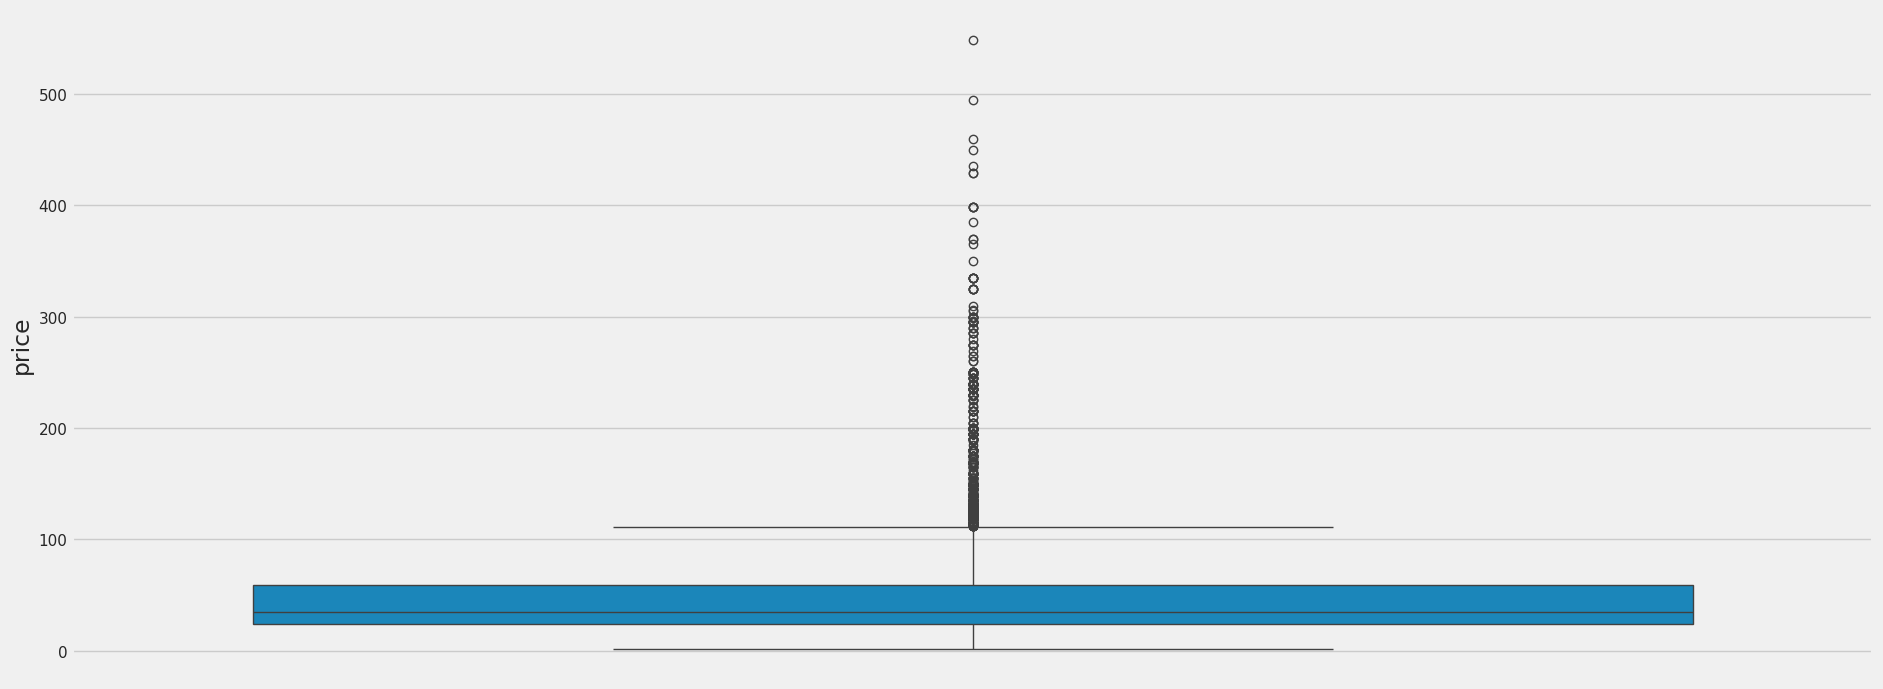

In [18]:
sns.boxplot(df_pec['price'])

35.0
-28.5
111.5


<Axes: ylabel='price'>

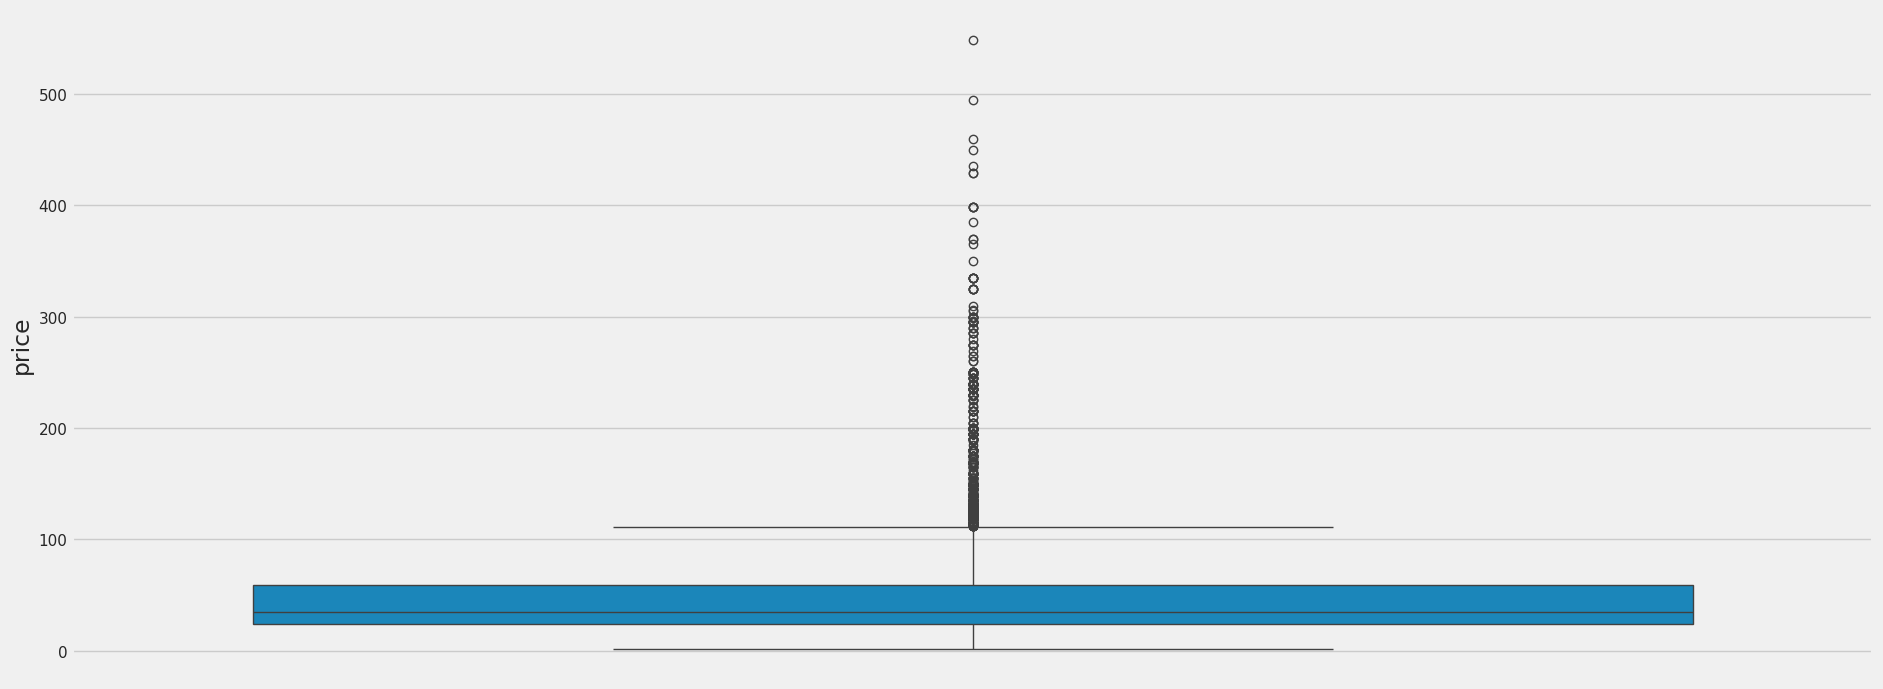

In [19]:
# Handle outliers
Q1 = df_pec['price'].quantile(0.25)
Q3 = df_pec['price'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)

df_pec = df_pec[(df_pec['price'] > lower_limit) | (df_pec['price'] < upper_limit)]

sns.boxplot(df_pec['price'])

<Axes: xlabel='price', ylabel='Count'>

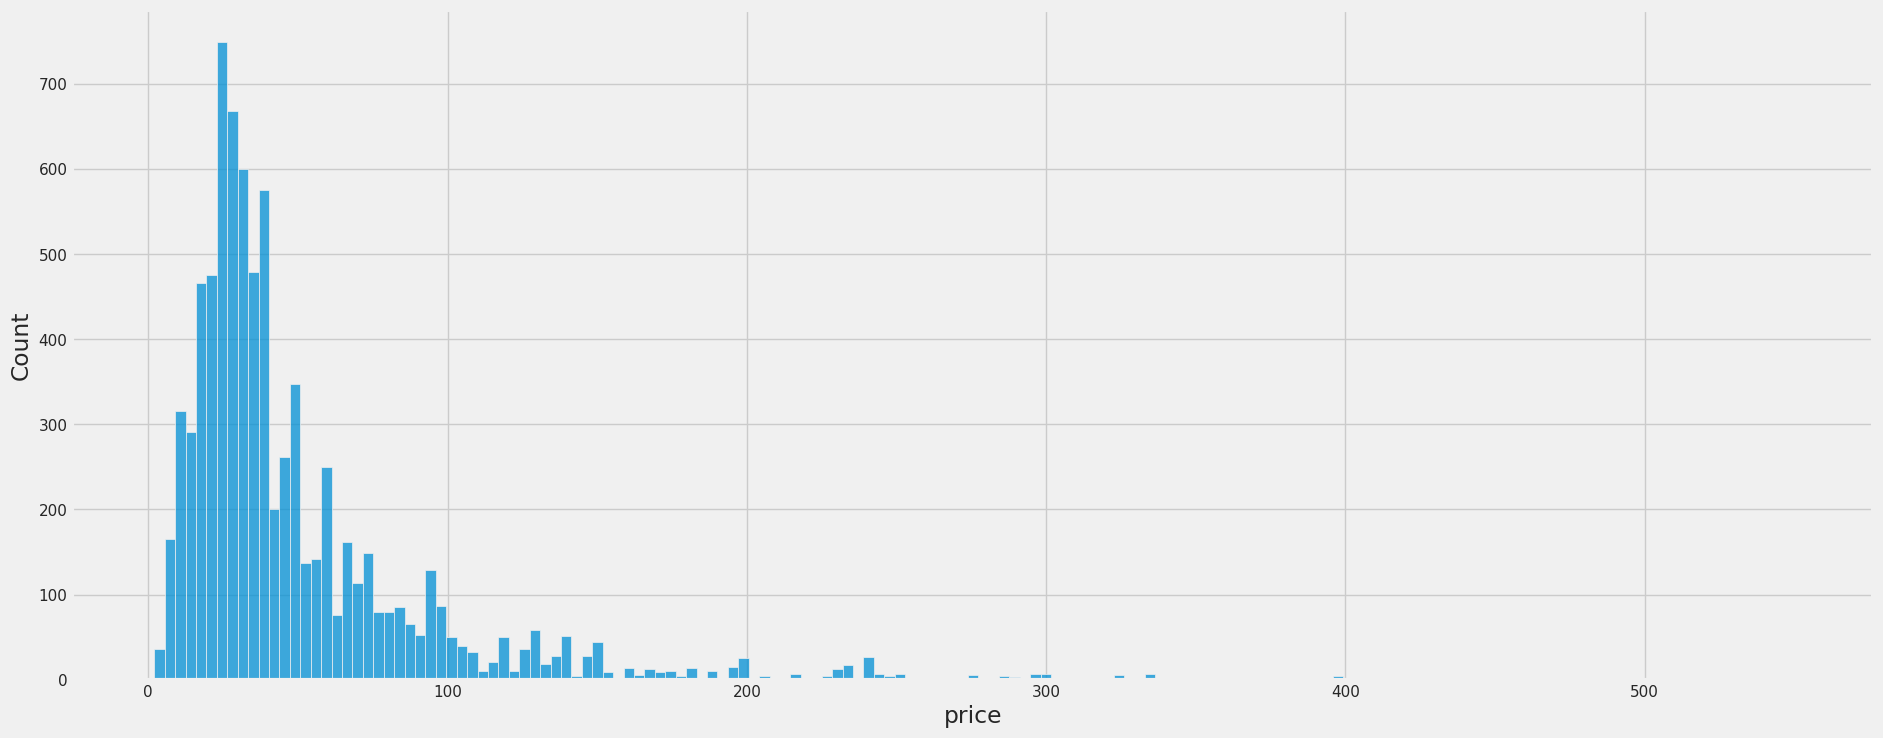

In [20]:
# Feature transformation
sns.histplot(df_pec['price'])

<Axes: xlabel='price', ylabel='Count'>

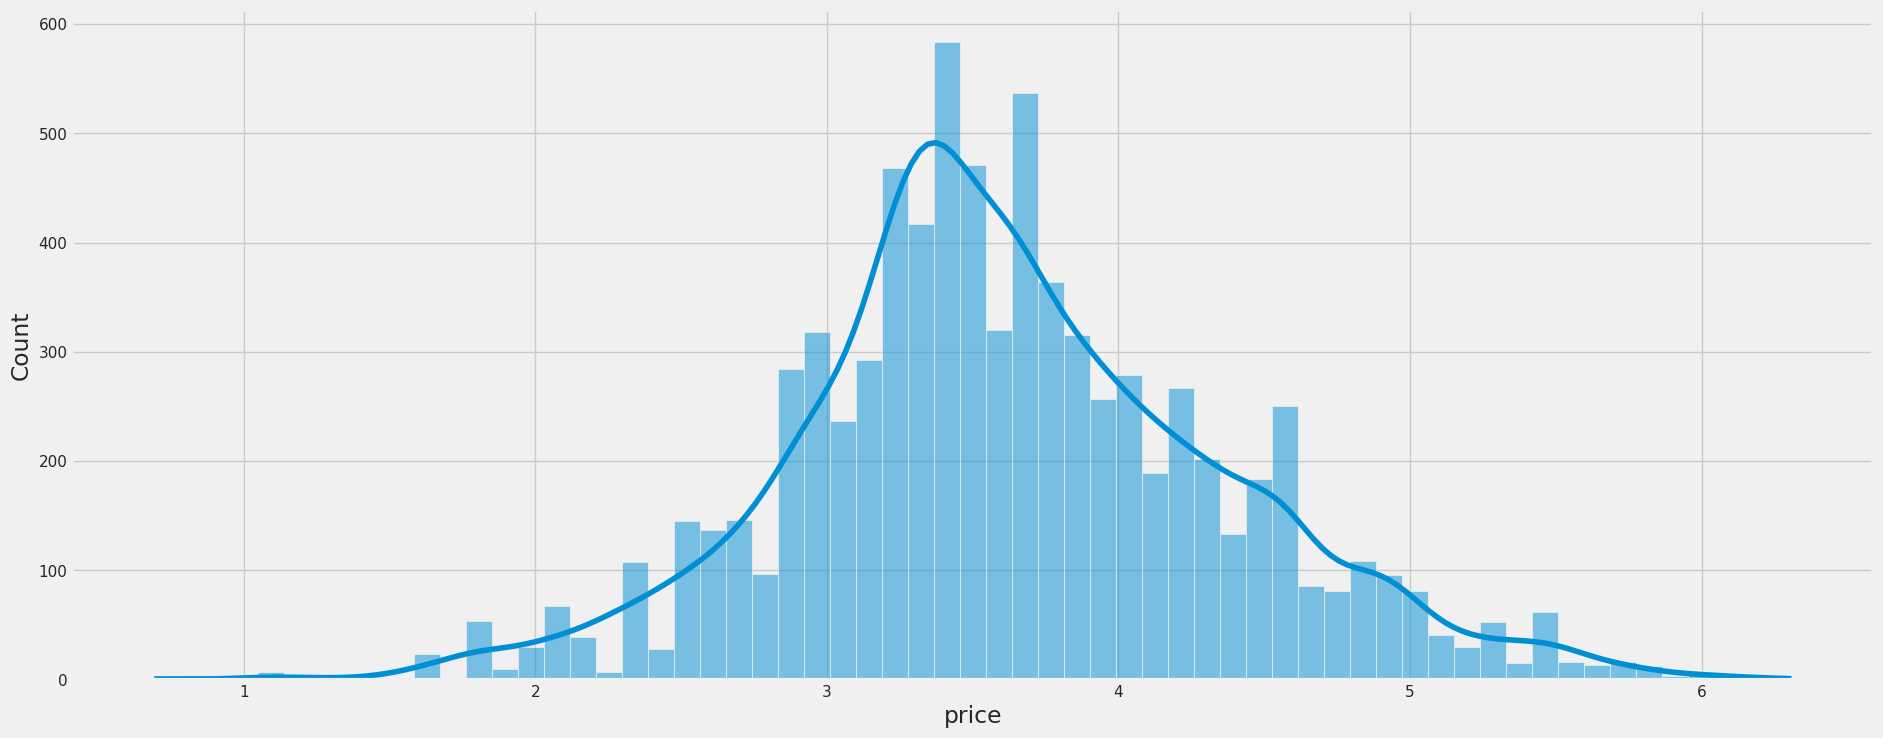

In [21]:
df_pec['price'] = np.log(df_pec['price'])
sns.histplot(df_pec['price'], kde=True)

In [22]:
# Feature encoding
df_onehot_encoded = pd.get_dummies(df_pec, dtype=int)
df_onehot_encoded.sample(10)

,id,rating,number_of_reviews,love,price,value_price,exclusive,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,...,category_Skincare Sets,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category
2538,1855584,5.0,7.0,1400.0,4.248495,70.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6982,2236750,0.0,0.0,445.0,2.772589,16.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5361,2131761,4.5,8000.0,14000.0,3.737670,66.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,906669,4.5,254.0,4400.0,4.624973,102.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6509,2210417,4.5,102.0,4700.0,4.356709,78.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3960,2027860,4.5,1000.0,11900.0,3.951244,52.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5275,2126894,4.5,69.0,9000.0,3.610918,37.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3410,1964584,4.5,431.0,20100.0,3.988984,54.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7464,2266153,3.5,71.0,14900.0,3.332205,28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7342,2259588,4.5,20.0,4700.0,4.007333,55.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Handle class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter as counter

x = df_onehot_encoded.drop(columns=['exclusive'])
y = df_onehot_encoded['exclusive']
sm = SMOTE(random_state=42)

x_res, y_res = sm.fit_resample(x, y)
print('Resampled data shape %s ' % counter(y_res))

Resampled data shape Counter({0: 5953, 1: 5953}) 


# 5. Feature Engineering (30 poin)


Cek feature yang ada sekarang, lalu lakukan:

## A. Feature selection
(membuang feature yang kurang relevan atau redundan)

In [31]:
df_selected = df_pec[['brand', 'price', 'love', 'rating', 'exclusive']]

df_selected.sample(10)

,brand,price,love,rating,exclusive
5008,Dr. Dennis Gross Skincare,6.075346,13800.0,4.0,0
5496,Aquis,3.401197,4700.0,4.5,1
7649,Natasha Denona,3.737670,5900.0,3.0,0
107,Benefit Cosmetics,3.401197,255900.0,4.5,0
1645,Juliette Has a Gun,4.976734,2100.0,4.0,0
1546,Erno Laszlo,4.219508,1400.0,4.5,0
4747,shu uemura,4.234107,1100.0,4.5,0
2877,Wander Beauty,3.332205,5500.0,4.5,0
5138,Too Faced,2.708050,0.0,4.5,0
4470,NARS,3.332205,19300.0,4.5,0


## B. Feature extraction
(membuat feature baru dari feature yang sudah ada)

In [32]:
price_binning = []
for i in df_selected['price']:
  if i < 3:
    price_binning.append('Cheap')
  elif i >= 3 and i <= 4:
    price_binning.append('Affordable')
  else:
    price_binning.append('Luxury')

df_selected['price_category'] = price_binning
df_selected.sample(10)

,brand,price,love,rating,exclusive,price_category
388,Hourglass,3.828641,3900.0,4.0,0,Affordable
4200,NUDESTIX,3.258097,4300.0,3.5,0,Affordable
6658,Laura Mercier,3.258097,4000.0,3.0,0,Affordable
5123,Charlotte Tilbury,4.007333,14700.0,3.5,0,Luxury
3982,SEPHORA COLLECTION,3.178054,2000.0,3.5,1,Affordable
2175,St. Tropez,3.401197,5700.0,4.0,0,Affordable
3303,Pretty Vulgar,3.258097,20300.0,4.5,1,Affordable
5662,CLINIQUE,3.663562,44600.0,3.5,0,Affordable
4993,Lancôme,3.277145,1700.0,4.0,0,Affordable
4428,PAT McGRATH LABS,3.465736,11900.0,4.0,0,Affordable


## C. Tuliskan minimal 4 feature tambahan

(selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

In [36]:
# likert_scale: kategori produk yang disukai konsumen berdasarkan jumlah 'love'
likert_scale = []
for i in df_selected['love']:
  if i < 5500:
    likert_scale.append('Less')
  elif i >= 5500 and i <= 10000:
    likert_scale.append('Average')
  else:
    likert_scale.append('Favorite')

df_selected['likert_scale'] = likert_scale

# brand_exclusive_product_freq: memberikan nilai bobot terhadap brand yang cenderung menjual produk eksklusif
df_selected['brand_exclusive_freq'] = df_selected.groupby('brand')['exclusive'].transform('mean')

# price_per_rating: mengukur kecenderungan pembeli dalam memilih produk dengan harga mahal/murah dengan rating yang sama
df_selected['price_per_rating'] = df_selected['price'] / (df_selected['rating'] + 0.1)

# brand_love_freq: mengukur brand yang disukai pengguna
df_selected['brand_love_freq'] = df_selected.groupby('brand')['love'].transform('mean')

df_selected.sample(10)

,brand,price,love,rating,exclusive,price_category,likert_scale,brand_exclusive_freq,price_per_rating,brand_love_freq
5753,Proactiv,2.995732,5200.0,4.5,0,Cheap,Less,0.000000,0.651246,1708.590909
2206,Estée Lauder,5.181784,18600.0,4.5,0,Luxury,Favorite,0.015873,1.126475,13752.603175
3873,SEPHORA COLLECTION,2.079442,0.0,4.0,1,Cheap,Less,0.957317,0.507181,17641.239754
3247,Jo Malone London,5.247024,2000.0,3.5,0,Luxury,Less,0.014925,1.457507,4464.746269
3857,Saturday Skin,3.332205,18900.0,4.5,0,Affordable,Favorite,0.285714,0.724392,13628.571429
5573,Eve Lom,2.890372,0.0,3.5,0,Cheap,Less,0.041667,0.802881,3935.625000
3589,Verb,2.890372,19200.0,4.0,0,Cheap,Favorite,0.027027,0.704969,7497.594595
3730,SEPHORA COLLECTION,2.772589,4600.0,4.0,1,Cheap,Less,0.957317,0.676241,17641.239754
1607,Klorane,2.995732,7700.0,4.5,0,Cheap,Average,0.000000,0.651246,5101.636364
2180,Clarins,3.258097,52200.0,4.0,0,Affordable,Favorite,0.018868,0.794658,6430.679245
